In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## TABLE OF CONTENT:


## 1) INTRODUCTION

## 2) NAIVE-BAYES THEOREM

## 3) SENTIMENTAL ANALYSIS

## 4) CASE STUDY: SENTIMENTAL ANALYSIS FOR MOVIE REVIEW USING NAVIE-BAYES CLASSIFIER

## 5) CONCLUSION


# 1. INTRODUCTION:

Bayes Theorem is named for English mathematician Thomas Bayes, who worked extensively in decision theory, the field of mathematics that involves probabilities.

Bayes Theorem is also used widely in machine learning, where it is a simple, effective way to predict classes with precision and accuracy. The Bayesian method of calculating conditional probabilities is used in machine learning applications that involve classification tasks.

A simplified version of the Bayes Theorem, known as the Naive Bayes Classification, is used to reduce computation time and costs. In this article, we take you through these concepts and discuss the applications of the Bayes Theorem in machine learning. 

# 2. NAVIE BAYES THEOREM:

### 2.1 Bayes Theorem Theory: 

Bayes Formula:
![](https://miro.medium.com/max/804/1*6dmvRYysiU5PwWIcHRdKVw.png)

Let’s Look into the terms:

P(C | x) = Probability of event C happening given that event x happened
P(x | C) = Probability of event x happening given that event C happened
P(C) = Probability of event C happening
P(x) = Probability of event x happening

The Bayes Theorem thus gives us a way to find the Conditional Probability . Bayes Theorem lies in the heart of the Naive Bayes theorem.

### 2.2. How to Apply Bayes Theorem in Machine Learning: 

The Naive Bayes Classifier, a simplified version of the Bayes Theorem, is used as a classification algorithm to classify data into various classes with accuracy and speed. 

Let’s see how the Naive Bayes Classifier can be applied as a classification algorithm. 

- Consider a general example: X is a vector consisting of ‘n’ attributes, that is, X = {x1, x2, x3, …, xn}.

- Say we have ‘m’ classes {C1, C2, …, Cm}. Our classifier will have to predict X belongs to a certain class. The class delivering the highest posterior probability will be chosen as the best class. So mathematically, the classifier will predict for class Ci iff P(Ci | X) > P(Cj | X). Applying Bayes Theorem:

P(Ci | X) = [P(X | Ci) * P(Ci)] / P(X)

- In this formula, P(X) is the condition-independent entity, which means it will be constant throughout the classes. It won’t change the value whenever the classes change. Therefore, to maximize P(Ci/X), which can also be termed as the precise answer to be derived, we will have to maximize the P(X/Ci) * P(Ci) value.

- With n number classes on the probability list let’s assume that the possibility of any class being the right answer is equally likely. Considering this factor, we can say that : P(C1)=P(C2)-P(C3)=P(C4)=…..=P(Cn).

- It is now easy to compute the smaller probabilities. One important thing to note here: since xk belongs to each attribute, we also need to check whether the attribute we are dealing with is categorical or continuous.

- Ultimately, we will have P(x | Ci) = F(xk, ?k, ?k).

Now, we have all the values we need to use Bayes Theorem for each class Ci. Our predicted class will be the class achieving the highest probability P(X | Ci) * P(Ci).

## 2.3. Advantage, DisAdvantage of Navie- Bayes Classifier:

## Advantage: 

- It is easy and fast to predict the class of the test data set. It also performs well in multi-class prediction.

- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.

- It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

## Disadvantage: 

- Naive Bayes is also known as a bad estimator, so the probability outputs are not to be taken too seriously.

- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

# 3. SENTIMENTAL ANALYSIS: 

  Sentiment analysis is basically concerned with analysis of emotions and opinions from text.

 A sentiment evaluation system for text analysis combines natural language processing (NLP) and laptop mastering methods to assign weighted sentiment scores to the entities, topics, issues and categories inside a sentence or phrase.It tries to find and justify sentiment of the person with respect to a given source of content.

I am proposing a highly accurate model of sentiment analysis from a datasets containing movie review score with the help of classifiers such as Naïve Bayes, the application can correctly classify the reviews of the given datasets as positive and negative to give sentiment of each movie.

# 4. SENTIMENTAL ANALYSIS FOR MOVIE REVIEW USING NAVIE-BAYES

In this kernel, we have to predict the number of positive and negative reviews based on sentiments by using Navie-Bayes classification models.

We will go through these steps:


## 4.1. Understanding the data:
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. 

In [4]:
# 4.1. Import library: 

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# 4.2. Import the data:
df=pd.read_csv('IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.describe().T

count unique                                                top   
review     50000  49582  Loved today's show!!! It was a variety and not...  \
sentiment  50000      2                                           positive   

            freq  
review         5  
sentiment  25000

## 4.2. EDA and DATA PREPROCESSING:

## EDA:

In [8]:
#sentiment count: 
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [9]:
df['review'].str.len()

0        1761
1         998
2         926
3         748
4        1317
         ... 
49995    1008
49996     642
49997    1280
49998    1234
49999     678
Name: review, Length: 50000, dtype: int64

Our dataset set is balanced. Next, We’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the movie's review.

<Axes: >

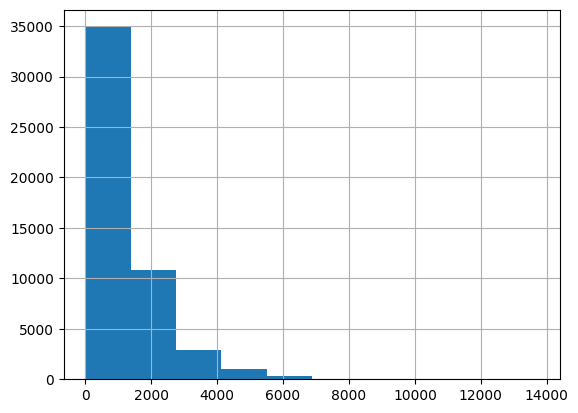

In [10]:
df['review'].str.len().hist()


The histogram shows that reviews range from 10 to 14000 characters and generally, it is between 10 to 1500 characters.

Now, we will move on the histogram for positive review and negative review respectively. Let's plot!

Text(0.5, 1.0, 'Negative Reviews')

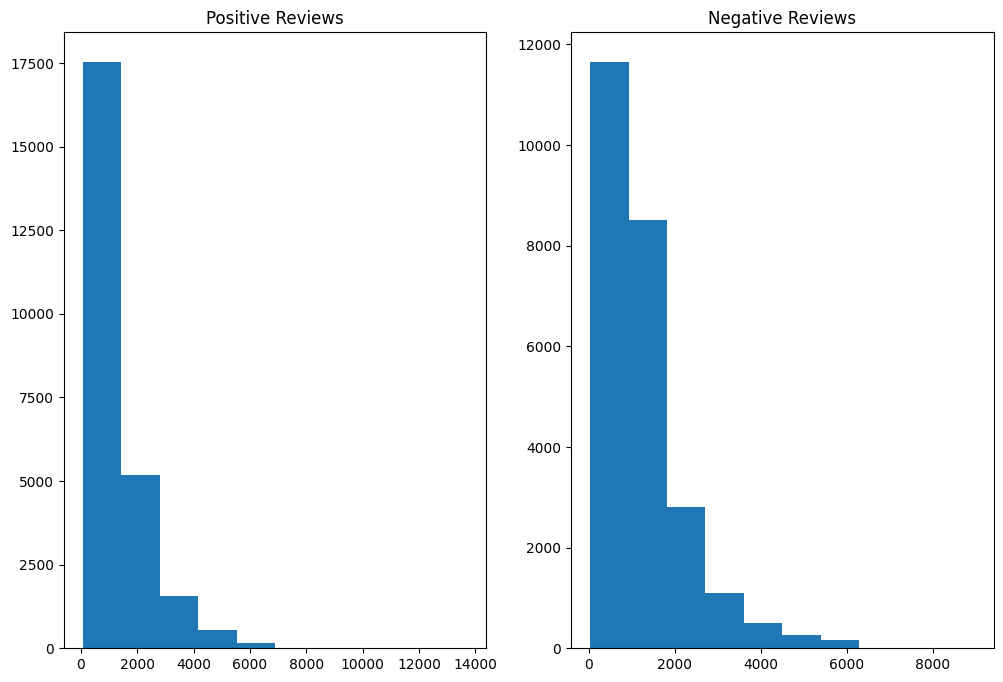

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['sentiment']=='positive']['review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']=='negative']['review'].str.len())
ax2.set_title( 'Negative Reviews')

we can observe some insights from the graph above: 
- In general, people comment less word in the positive review to compare with negative review
- However the range of word for positive review are bigger than the range of negative review. It means in some cases, people give a long comments for excellent movies and people could less critise for bad movies

Before we move on to the next section: data preprocessing to clean the text data, we will make a wordcloud graph to show the most used words in large font and the least used words in small font in positive review and negative review

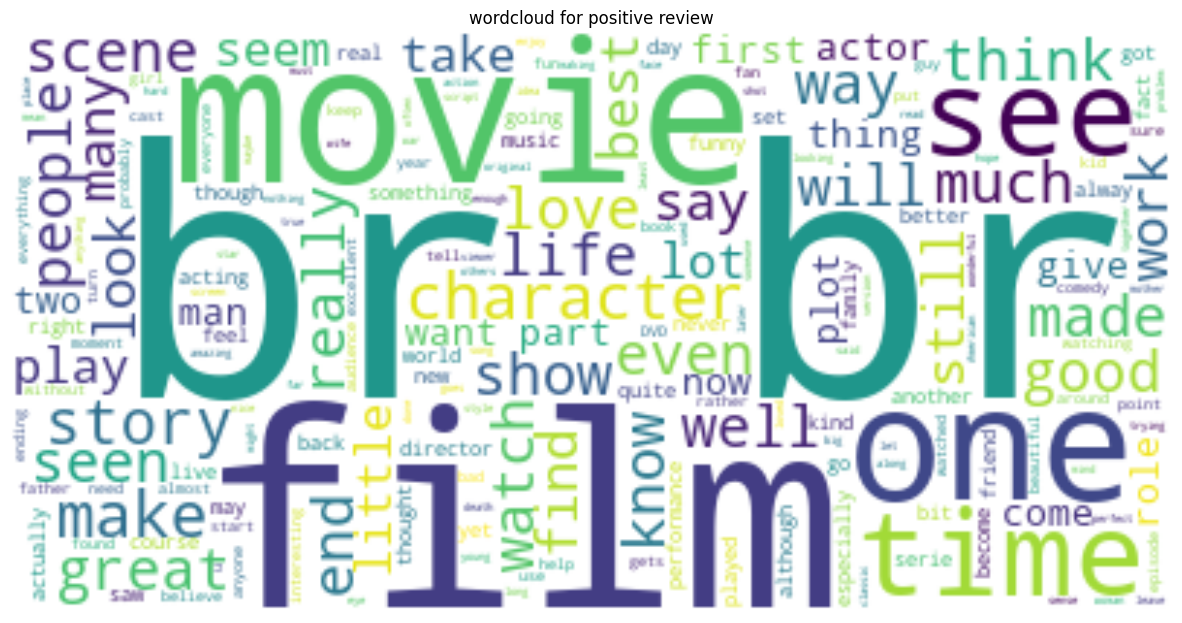

In [31]:
text = " ".join(i for i in df[df['sentiment']=='positive']['review'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

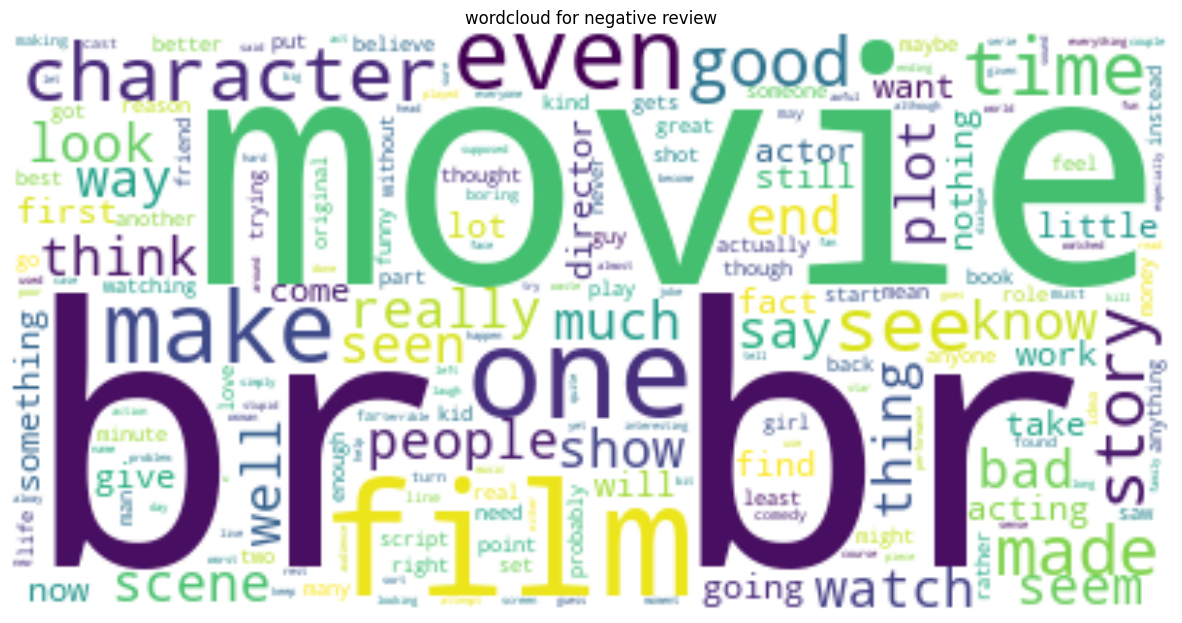

In [12]:
text = " ".join(i for i in df[df['sentiment']=='negative']['review'])
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

The wordcloud graphs in both negative and postitive comments don't show meaningful result. 

That's is the reason why text preprosessing is needed. 

Let's start the preproceesing process. 

## PREPROCESSING:

In [11]:
df.rename(columns={'review':'text'}, inplace = True)
df

text sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [12]:
import re
import string

def cleaning(text):
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing numbers
    text = re.sub(r'<.*?>+', '', text) # removing special characters
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) # removing punctuations
    text = re.sub(r'\n', '', text) # removing newlines
    text = re.sub(r'[’“”…]', '', text) # removing special characters

    # removing emoji
    emoji_pattern = re.compile(r"[" 
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # removing short forms
    text = re.sub(r"isn't", 'is not', text)
    text = re.sub(r"he's", 'he is', text)
    text = re.sub(r"wasn't", 'was not', text)
    text = re.sub(r"there's", 'there is', text)
    text = re.sub(r"couldn't", 'could not', text)
    text = re.sub(r"won't", 'will not', text)
    text = re.sub(r"they're", 'they are', text)
    text = re.sub(r"she's", 'she is', text)
    text = re.sub(r"There's", 'there is', text)
    text = re.sub(r"wouldn't", 'would not', text)
    text = re.sub(r"haven't", 'have not', text)
    text = re.sub(r"That's", 'That is', text)
    text = re.sub(r"you've", 'you have', text)
    text = re.sub(r"He's", 'He is', text)
    text = re.sub(r"what's", 'what is', text)
    text = re.sub(r"weren't", 'were not', text)
    text = re.sub(r"we're", 'we are', text)
    text = re.sub(r"hasn't", 'has not', text)
    text = re.sub(r"you'd", 'you would', text)
    text = re.sub(r"shouldn't", 'should not', text)
    text = re.sub(r"let's", 'let us', text)
    text = re.sub(r"they've", 'they have', text)
    text = re.sub(r"You'll", 'You will', text)
    text = re.sub(r"i'm", 'i am', text)
    text = re.sub(r"we've", 'we have', text)
    text = re.sub(r"it's", 'it is', text)
    text = re.sub(r"don't", 'do not', text)
    text = re.sub(r"that´s", 'that is', text)
    text = re.sub(r"I´m", 'I am', text)
    text = re.sub(r"it’s", 'it is', text)
    text = re.sub(r"she´s", 'she is', text)
    text = re.sub(r"he’s'", 'he is', text)
    text = re.sub(r'I’m', 'I am', text)
    text = re.sub(r'I’d', 'I did', text)
    text = re.sub(r"he’s'", 'he is', text)
    text = re.sub(r'there’s', 'there is', text)

    return text

# Assuming df is your DataFrame
dt = df['text'].apply(cleaning)


In [13]:
df['sentiment']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [14]:
dt = pd.DataFrame(dt)  
dt['sentiment']=df['sentiment']
dt

text sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production the filming tech...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically theres a family where a little boy j...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  im going to have to disagree with the previous...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]

In [16]:
# remove stop word: 
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [17]:
dt

text sentiment   
0      one of the other reviewers has mentioned that ...  positive  \
1      a wonderful little production the filming tech...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically theres a family where a little boy j...  negative   
4      petter matteis love in the time of money is a ...  positive   
...                                                  ...       ...   
49995  i thought this movie did a down right good job...  positive   
49996  bad plot bad dialogue bad acting idiotic direc...  negative   
49997  i am a catholic taught in parochial elementary...  negative   
49998  im going to have to disagree with the previous...  negative   
49999  no one expects the star trek movies to be high...  negative   

                                                   no_sw  
0      reviewers mentioned watching oz episode youll ...  
1      wonderful production filming technique unassum...  
2      wonderful spend time hot summer weekend sittin...  
3      basically family boy jake thinks zombie closet...  
4      petter matteis love time money visually stunni...  
...                                                  ...  
49995  movie job creative original expecting lotta fu...  
49996  plot dialogue acting idiotic directing annoyin...  
49997  catholic taught parochial elementary schools n...  
49998  disagree previous comment side maltin rate exc...  
49999  expects star trek movies high art fans expect ...  

[50000 rows x 3 columns]

In [18]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0       movie  83576
1        film  74511
2        time  23298
3       story  22062
4       great  17723
5      movies  15447
6        made  15414
7       films  15294
8        make  15284
9  characters  14657

In [21]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)


In [19]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

text sentiment   
0  one of the other reviewers has mentioned that ...  positive  \
1  a wonderful little production the filming tech...  positive   
2  i thought this was a wonderful way to spend ti...  positive   
3  basically theres a family where a little boy j...  negative   
4  petter matteis love in the time of money is a ...  positive   

                                               no_sw   
0  reviewers mentioned watching oz episode youll ...  \
1  wonderful production filming technique unassum...   
2  wonderful spend time hot summer weekend sittin...   
3  basically family boy jake thinks zombie closet...   
4  petter matteis love time money visually stunni...   

                                         wo_stopfreq  
0  reviewers mentioned watching oz episode youll ...  
1  wonderful production filming technique unassum...  
2  wonderful spend hot summer weekend sitting air...  
3  basically family boy jake thinks zombie closet...  
4  petter matteis love money visually stunning wa...

In [18]:
dt['no_sw'].loc[5]

'probably alltime favorite movie story selflessness sacrifice dedication noble preachy boring despite times years paul lukas performance brings tears eyes bette davis sympathetic roles delight kids grandma dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd movie'

In [19]:
dt['wo_stopfreq'].loc[5]

'probably alltime favorite selflessness sacrifice dedication noble preachy boring despite times years paul lukas performance brings tears eyes bette davis sympathetic roles delight kids grandma dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd'

In [20]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.
import nltk

# Download the wordnet corpus
nltk.download('wordnet')


wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


text sentiment   
0      one of the other reviewers has mentioned that ...  positive  \
1      a wonderful little production the filming tech...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically theres a family where a little boy j...  negative   
4      petter matteis love in the time of money is a ...  positive   
...                                                  ...       ...   
49995  i thought this movie did a down right good job...  positive   
49996  bad plot bad dialogue bad acting idiotic direc...  negative   
49997  i am a catholic taught in parochial elementary...  negative   
49998  im going to have to disagree with the previous...  negative   
49999  no one expects the star trek movies to be high...  negative   

                                                   no_sw   
0      reviewers mentioned watching oz episode youll ...  \
1      wonderful production filming technique unassum...   
2      wonderful spend time hot summer weekend sittin...   
3      basically family boy jake thinks zombie closet...   
4      petter matteis love time money visually stunni...   
...                                                  ...   
49995  movie job creative original expecting lotta fu...   
49996  plot dialogue acting idiotic directing annoyin...   
49997  catholic taught parochial elementary schools n...   
49998  disagree previous comment side maltin rate exc...   
49999  expects star trek movies high art fans expect ...   

                                             wo_stopfreq   
0      reviewers mentioned watching oz episode youll ...  \
1      wonderful production filming technique unassum...   
2      wonderful spend hot summer weekend sitting air...   
3      basically family boy jake thinks zombie closet...   
4      petter matteis love money visually stunning wa...   
...                                                  ...   
49995  job creative original expecting lotta fun dvd ...   
49996  plot dialogue acting idiotic directing annoyin...   
49997  catholic taught parochial elementary schools n...   
49998  disagree previous comment side maltin rate exc...   
49999  expects star trek high art fans expect episode...   

                                         wo_stopfreq_lem  
0      reviewers mentioned watching oz episode youll ...  
1      wonderful production filming technique unassum...  
2      wonderful spend hot summer weekend sitting air...  
3      basically family boy jake thinks zombie closet...  
4      petter matteis love money visually stunning wa...  
...                                                  ...  
49995  job creative original expecting lotta fun dvd ...  
49996  plot dialogue acting idiotic directing annoyin...  
49997  catholic taught parochial elementary schools n...  
49998  disagree previous comment side maltin rate exc...  
49999  expects star trek high art fans expect episode...  

[50000 rows x 5 columns]

### Now, the data is clean! we can move to the next step: Navie_Bayes Modelling!

# 4.3. Tokenization

In [21]:
# create the cleaned data for the train-test split:
nb= dt.drop(columns=['text','no_sw', 'wo_stopfreq'])
nb.columns=['sentiment', 'review']
nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]
nb

sentiment                                             review
0              1  reviewers mentioned watching oz episode youll ...
1              1  wonderful production filming technique unassum...
2              1  wonderful spend hot summer weekend sitting air...
3              0  basically family boy jake thinks zombie closet...
4              1  petter matteis love money visually stunning wa...
...          ...                                                ...
49995          1  job creative original expecting lotta fun dvd ...
49996          0  plot dialogue acting idiotic directing annoyin...
49997          0  catholic taught parochial elementary schools n...
49998          0  disagree previous comment side maltin rate exc...
49999          0  expects star trek high art fans expect episode...

[50000 rows x 2 columns]

In [22]:
tokenized_review=nb['review'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [reviewers, mentioned, watching, oz, episode, ...
1    [wonderful, production, filming, technique, un...
2    [wonderful, spend, hot, summer, weekend, sitti...
3    [basically, family, boy, jake, thinks, zombie,...
4    [petter, matteis, love, money, visually, stunn...
Name: review, dtype: object

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['review'])

C:\Users\sanja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



# 4.4. Train-test Split: 

In [27]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

We will now split the data for training and testing to check how well our model has performed. 

Also we will randomize the data in case our data includes all positive first and then all negative or some other kind of bias. 

We will use: scikit_learn's train_test_split() for splitting the text_count (which contains our X) and dataset['Sentiment'] (this contains Y).

# 4.5. Navies Bayes Modelling:


In this section, we will go through different Navies Bayes Model: ComplementNB, MultinatinominalNB, BernoulliNB and see how accuracy each model can be:

### a) Complement NB model:

In [28]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))


ComplementNB model accuracy is 86.22%
------------------------------------------------
Confusion Matrix:
      0     1
0  4327   650
1   728  4295
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4977
           1       0.87      0.86      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Interpret the result: 

- ### Accuracy score:
is 86.33 % for the complementNB model. for each  of 100 total number of prediction, in average, our model can predict 86 cases correctly

-  The confusion matrix: 
* True Positive: The actual value was 4349 negative reviews  and the model predicted 4349 negative reviews
* True Negative: The actual value was 4284 positive reviews and the model predict 4248 negative reviews
* False Positive: The actual values was 628 postive reviews and the model predicted 628 negative reviews
* False Negative: The actual values was 739 negative reviews and the model preditced 739 positive reviews

- Classification Report:

* ### Precision:
- Negative review: the ratio correctly predicted negative review observations to the total predicted negative review observations is 0.85
- Positive review: the ratio correctly predicted positive review observations to the total predicted positive review observations is 0.87

* ### Recall:
- Negative review: the ratio of correctly predicted negative review observations to the all observations in actual class is 0.87
- Positive review: the ratio of correctly predicted positive review observations to the all observations in actual class is 0.85

* F1 Score is the weighted average of Precision and Recall. In both case positive and negative review, F1 scores are equal 0.86

We can apply the same interpretation for the following models


### b) Mutilnominal NB model:

In [27]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 86.21%
------------------------------------------------
Confusion Matrix:
      0     1
0  4327   650
1   729  4294
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4977
           1       0.87      0.85      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### c) Bernoulli NB model:

In [62]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 83.75%
------------------------------------------------
Confusion Matrix:
      0     1
0  4403   574
1  1051  3972
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      4977
           1       0.87      0.79      0.83      5023

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### Plot Confusion Matrices:
Plot confusion matrix for CNB, MNB, BNB model:

In [29]:
!pip install --upgrade scikit-learn


     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sanja\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------ --------------------------------- 1.9/11.0 MB 36.9 kB/s eta 0:04:07
     ------ --------------------------------- 1.9/11.0 MB 36.9 kB/s eta 0:04:07
     ------ --------------------------------- 1.9/11.0 MB 36.9 kB/s eta 0:04:07
     ------ --------------------------------- 1.9/11.0 MB 36.9 kB/s eta 0:04:07
     ------ --------------------------------- 1.9/11.0 MB 36.9 kB/s eta 0:04:07
     ------ --------------------------------- 1.9/11.0 MB 36.9 kB/s eta 0:04:07
     ------ --------------------------------- 1.9/11.0 MB 36.9 kB/s eta 0:04:07
     ------ --------------------------------- 1.9/11.0 MB 36.9 kB/s eta 0:04:07
     ------ --------------------------------- 1.9/11.0 MB 36.7 kB/s eta 0:04:08
     ------ --------------------------------- 1.9/11.0 MB 36.7 kB/s eta 0:04:08
     ------ --------------------------------- 1.9/11.0 MB 36.7 kB/s eta 0:04:08
     ------ --------------------------------- 1.9/11.0 MB 36.7 kB/s eta 0:04:08
     ------ ---------------------------

In [36]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
k= [CNB, MNB, BNB]
for i in k: 
    plot_confusion_matrix(i, X_test, y_test)  
    plt.title(i)
    plt.show()

In [35]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models: 
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

NameError: name 'BNB' is not defined

## 4.6 Trying different n-grams:


### a) Bigram: ngram_range = (2,2)

In [64]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_twograms = CountVectorizer(stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
text_counts_twograms = cv_twograms.fit_transform(nb['review'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_twograms, nb['sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

C:\Users\91949\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



model accuracy is 84.47%


### b) Trigram: ngram_range= (3,3)¶

In [33]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_threegrams = CountVectorizer(stop_words='english',ngram_range = (3,3),tokenizer = token.tokenize)
text_counts_threegrams = cv_threegrams.fit_transform(nb['review'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_threegrams, nb['sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')


model accuracy is 67.45%


## 4.7 TF-IDF: Term Frequency-Inverse Document Frequency

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(nb['review'])

In [31]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, nb['sentiment'],test_size=0.20,random_state=30)


In [60]:
#fitting the model with MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')



NameError: name 'MNB' is not defined

In [68]:
#fitting the model with BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')


accuracy_score_bnb = 83.76%


In [69]:
# fitting the model with CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

accuracy_score_cnb = 86.67%


In [37]:
import gensim
from gensim import corpora

# Further text cleaning (if needed)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(token)
    return result

# Tokenizing and removing stop words
processed_docs = dt['wo_stopfreq'].map(preprocess)

# Creating a dictionary
dictionary = corpora.Dictionary(processed_docs)

# Creating a corpus
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

print(dictionary)
print(corpus[:1])


Dictionary<198910 unique tokens: ['accustomed', 'agenda', 'agreements', 'appeal', 'audiences']...>
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 3), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 3), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1),

https://www.jigsawacademy.com/blogs/ai-ml/bayes-theorem-in-machine-learning

https://www.upgrad.com/blog/bayes-theorem-in-machine-learning/

https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e

https://github.com/DrManishSharma/NLP/blob/master/SentiAnalysis.ipynb

In [42]:
# Train the LDA model
lda_model = gensim.models.LdaMulticore(corpus, 
                                       id2word=dictionary, 
                                       num_topics=10, 
                                       random_state=100, 
                                       chunksize=100, 
                                       passes=10, 
                                       per_word_topics=True)


In [43]:
# Display the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.010*"series" + 0.008*"original" + 0.007*"watch" + 0.006*"show" + 0.006*"book" + 0.006*"music" + 0.005*"version" + 0.005*"years" + 0.005*"love" + 0.004*"action"')
(1, '0.020*"horror" + 0.006*"killer" + 0.006*"blood" + 0.005*"house" + 0.005*"gore" + 0.005*"dead" + 0.005*"scene" + 0.005*"scenes" + 0.004*"effects" + 0.004*"pretty"')
(2, '0.022*"western" + 0.010*"ford" + 0.009*"westerns" + 0.009*"snakes" + 0.007*"stooges" + 0.007*"stanwyck" + 0.007*"horse" + 0.006*"wayne" + 0.006*"indians" + 0.005*"frost"')
(3, '0.022*"batman" + 0.011*"keaton" + 0.009*"welles" + 0.009*"freddy" + 0.008*"scarlett" + 0.007*"woody" + 0.007*"myers" + 0.006*"puppets" + 0.005*"bean" + 0.005*"ernest"')
(4, '0.009*"role" + 0.009*"love" + 0.008*"performance" + 0.007*"character" + 0.007*"cast" + 0.006*"plays" + 0.006*"young" + 0.006*"played" + 0.005*"comedy" + 0.005*"wife"')
(5, '0.009*"life" + 0.006*"world" + 0.004*"real" + 0.004*"love" + 0.003*"character" + 0.003*"young" + 0.003*"director" + 0.003*"years" + 0

In [44]:
import pandas as pd

# Adding a topic column to the dataframe
def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num, topn=10)
                topic_keywords = ", ".join([word for word, prop in wp])
                row_df = pd.DataFrame([[int(topic_num), round(prop_topic, 4), topic_keywords]], 
                                      columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
                sent_topics_df = pd.concat([sent_topics_df, row_df], ignore_index=True)
            else:
                break

    contents = pd.Series(texts).reset_index(drop=True)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=dt['wo_stopfreq'])
df_topic_sents_keywords.head()


Dominant_Topic  Perc_Contribution   
0               5             0.4324  \
1               0             0.6562   
2               7             0.3104   
3               1             0.3350   
4               5             0.6585   

                                      Topic_Keywords   
0  life, world, real, love, character, young, dir...  \
1  series, original, watch, show, book, music, ve...   
2  watch, acting, show, plot, funny, watching, wo...   
3  horror, killer, blood, house, gore, dead, scen...   
4  life, world, real, love, character, young, dir...   

                                         wo_stopfreq  
0  reviewers mentioned watching oz episode youll ...  
1  wonderful production filming technique unassum...  
2  wonderful spend hot summer weekend sitting air...  
3  basically family boy jake thinks zombie closet...  
4  petter matteis love money visually stunning wa...

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Tokenize and remove stop words
def extract_keywords(text, num=10):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    fdist = FreqDist(words)
    return fdist.most_common(num)

# Extracting keywords from a sample text
sample_text = df['text'][0]
keywords = extract_keywords(sample_text)
print(keywords)


[('oz', 6), ('br', 6), ('violence', 4), ('show', 3), ('prison', 3), ('forget', 3), ('watching', 2), ('episode', 2), ('struck', 2), ('city', 2)]


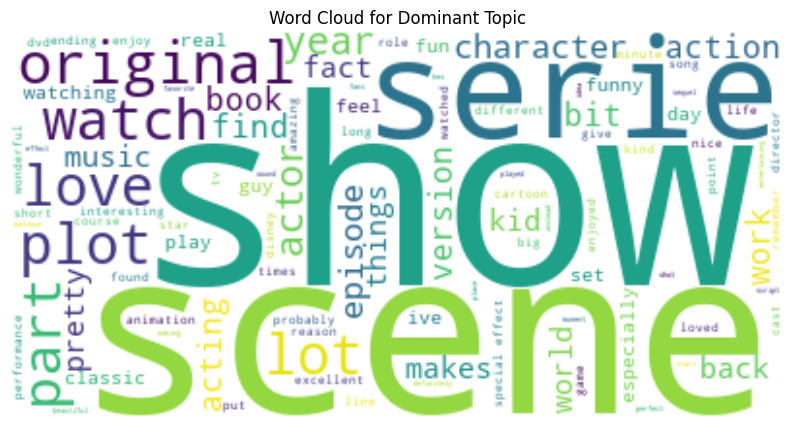

In [46]:
from wordcloud import WordCloud

# Generating word cloud for the dominant topic
dominant_topic = df_topic_sents_keywords[df_topic_sents_keywords.Dominant_Topic == 0]
text = ' '.join(dominant_topic['wo_stopfreq'])
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Dominant Topic')
plt.show()


In [45]:
# Evaluate the coherence score of the topic model
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda:.2f}')

Coherence Score: 0.40


In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

In [46]:
# Tokenize the text
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(dt['wo_stopfreq'])
sequences = tokenizer.texts_to_sequences(dt['wo_stopfreq'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)


In [58]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'df' is your DataFrame and 'wo_stopfreq' is the cleaned text column

# Parameters
max_words = 5000  # Adjust based on your dataset
max_len = 100  # Adjust based on your dataset

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(nb['review'])
sequences = tokenizer.texts_to_sequences(nb['review'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(nb['sentiment'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# Build the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64))  # Removed input_length
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_lstm = (model.predict(X_test) > 0.5).astype("int32")
accuracy_lstm = metrics.accuracy_score(y_test, y_pred_lstm)
print(f'Bidirectional LSTM Model Accuracy: {accuracy_lstm * 100:.2f}%')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_lstm)))
print('Classification Report:')
print(classification_report(y_test, y_pred_lstm))


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 141ms/step - accuracy: 0.7555 - loss: 0.4788 - val_accuracy: 0.8621 - val_loss: 0.3289
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 65s 130ms/step - accuracy: 0.8919 - loss: 0.2664 - val_accuracy: 0.8574 - val_loss: 0.3301
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 67s 134ms/step - accuracy: 0.9209 - loss: 0.2037 - val_accuracy: 0.8589 - val_loss: 0.3632
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 68s 136ms/step - accuracy: 0.9425 - loss: 0.1580 - val_accuracy: 0.8400 - val_loss: 0.3972
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 69s 138ms/step - accuracy: 0.9549 - loss: 0.1279 - val_accuracy: 0.8497 - val_loss: 0.4620
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step
Bidirectional LSTM Model Accuracy: 84.97%
Confusion Matrix:
      0     1
0  4144   817
1   686  4353
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4961
           1       0.84      0.86      0.85      5039

    accuracy      

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'df' is your DataFrame and 'nb' is the cleaned text column with 'review' and 'sentiment'

# Parameters
max_words = 20000  # Adjust based on your dataset size and vocabulary
max_len = 100  # Adjust based on your dataset

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(nb['review'])
sequences = tokenizer.texts_to_sequences(nb['review'])

# Check the distribution of sequence lengths
seq_lengths = [len(seq) for seq in sequences]
print(f'Max sequence length: {max(seq_lengths)}')
print(f'Average sequence length: {np.mean(seq_lengths)}')
print(f'Median sequence length: {np.median(seq_lengths)}')

# Adjust max_len based on the distribution (you can change 100 to another value if needed)
max_len = min(max(seq_lengths), 100)

padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(nb['sentiment'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# Build the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64))  # Removed input_length
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_lstm = (model.predict(X_test) > 0.5).astype("int32")
accuracy_lstm = metrics.accuracy_score(y_test, y_pred_lstm)
print(f'Bidirectional LSTM Model Accuracy: {accuracy_lstm * 100:.2f}%')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_lstm)))
print('Classification Report:')
print(classification_report(y_test, y_pred_lstm))


Max sequence length: 997
Average sequence length: 77.07674
Median sequence length: 57.0
Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 116s 200ms/step - accuracy: 0.7470 - loss: 0.4948 - val_accuracy: 0.8658 - val_loss: 0.3058
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 195ms/step - accuracy: 0.9302 - loss: 0.1947 - val_accuracy: 0.8593 - val_loss: 0.3392
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 96s 192ms/step - accuracy: 0.9650 - loss: 0.1072 - val_accuracy: 0.8511 - val_loss: 0.4233
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 194ms/step - accuracy: 0.9822 - loss: 0.0602 - val_accuracy: 0.8495 - val_loss: 0.4572
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 195ms/step - accuracy: 0.9877 - loss: 0.0460 - val_accuracy: 0.8410 - val_loss: 0.6169
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step
Bidirectional LSTM Model Accuracy: 85.14%
Confusion Matrix:
      0     1
0  4306   655
1   831  4208
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87     

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'df' is your DataFrame and 'nb' is the cleaned text column with 'review' and 'sentiment'

# Parameters
max_words = 30000  # Increase based on your dataset size and vocabulary
max_len = 200  # Increase based on your dataset

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(nb['review'])
sequences = tokenizer.texts_to_sequences(nb['review'])

# Check the distribution of sequence lengths
seq_lengths = [len(seq) for seq in sequences]
print(f'Max sequence length: {max(seq_lengths)}')
print(f'Average sequence length: {np.mean(seq_lengths)}')
print(f'Median sequence length: {np.median(seq_lengths)}')

# Adjust max_len based on the distribution (you can change 200 to another value if needed)
max_len = min(max(seq_lengths), 200)

padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(nb['sentiment'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# Build the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128))  # Increase embedding dimension
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # Increase LSTM units
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))  # Increase LSTM units
model.add(Dense(1, activation='sigmoid'))

# Adjust learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)  # Increase epochs

# Evaluate the model
y_pred_lstm = (model.predict(X_test) > 0.5).astype("int32")
accuracy_lstm = metrics.accuracy_score(y_test, y_pred_lstm)
print(f'Bidirectional LSTM Model Accuracy: {accuracy_lstm * 100:.2f}%')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_lstm)))
print('Classification Report:')
print(classification_report(y_test, y_pred_lstm))


In [63]:

# Prepare data for LDA
def preprocess(text):
    return [word for word in text.split() if word not in stop_words and len(word) > 3]

processed_docs = nb['review'].apply(preprocess)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train LDA model
lda_model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=10, random_state=100, passes=10)

# Display the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.017*"show" + 0.008*"funny" + 0.008*"watch" + 0.005*"love" + 0.005*"comedy" + 0.005*"kids" + 0.004*"life" + 0.004*"character" + 0.004*"shows" + 0.004*"watching"')
(1, '0.005*"musical" + 0.004*"music" + 0.004*"songs" + 0.004*"play" + 0.003*"song" + 0.003*"disney" + 0.003*"version" + 0.002*"singing" + 0.002*"love" + 0.002*"performance"')
(2, '0.005*"tarzan" + 0.003*"mummy" + 0.003*"match" + 0.002*"back" + 0.002*"star" + 0.002*"original" + 0.002*"english" + 0.002*"victoria" + 0.002*"character" + 0.002*"watch"')
(3, '0.007*"series" + 0.004*"episode" + 0.004*"show" + 0.003*"plot" + 0.003*"character" + 0.003*"original" + 0.002*"interesting" + 0.002*"life" + 0.002*"years" + 0.002*"world"')
(4, '0.004*"john" + 0.004*"comedy" + 0.003*"character" + 0.003*"scene" + 0.003*"back" + 0.002*"wife" + 0.002*"town" + 0.002*"plays" + 0.002*"western" + 0.002*"role"')
(5, '0.006*"life" + 0.004*"world" + 0.004*"young" + 0.003*"real" + 0.003*"american" + 0.002*"character" + 0.002*"history" + 0.002*"part

Total unique words in the dataset: 215130


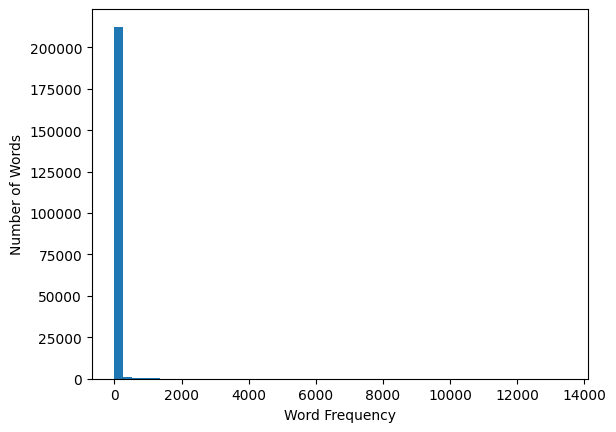

90th percentile word frequency: 16.0
95th percentile word frequency: 47.0


In [72]:
# Tokenize the text to find the number of unique words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dt['wo_stopfreq'])

# Get the total number of unique words
total_unique_words = len(tokenizer.word_index)
print(f"Total unique words in the dataset: {total_unique_words}")

# Analyze word frequency distribution
word_counts = tokenizer.word_counts.values()
plt.hist(word_counts, bins=50)
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.show()

# Print statistics
print(f"90th percentile word frequency: {np.percentile(list(word_counts), 90)}")
print(f"95th percentile word frequency: {np.percentile(list(word_counts), 95)}")


In [ ]:
# Comparison summary
print("Comparison of Model Performance:")
print("=================================")
print(f"Naive Bayes Model Accuracy: {accuracy_score_bnb * 100:.2f}%")
print(f"Bidirectional LSTM Model Accuracy: {accuracy_lstm * 100:.2f}%")

print("\nNaive Bayes Confusion Matrix:\n", conf_matrix_nb)
print("Bidirectional LSTM Confusion Matrix:\n", conf_matrix_lstm)

print("\nNaive Bayes Classification Report:\n", class_report_nb)
print("Bidirectional LSTM Classification Report:\n", class_report_lstm)


In [ ]:
# Step 1: Perform Sentiment Analysis
nb['sentiment_label'] = predicted_sentiment_labels # From your sentiment analysis model

# Step 2: Apply Topic Modeling on positive and negative reviews separately
positive_reviews = nb[nb['sentiment_label'] == 1]['review']
negative_reviews = nb[nb['sentiment_label'] == 0]['review']

# Topic modeling on positive reviews
positive_processed_docs = positive_reviews.apply(preprocess)
positive_dictionary = corpora.Dictionary(positive_processed_docs)
positive_corpus = [positive_dictionary.doc2bow(doc) for doc in positive_processed_docs]
positive_lda_model = gensim.models.LdaMulticore(positive_corpus, id2word=positive_dictionary, num_topics=5)

# Topic modeling on negative reviews
negative_processed_docs = negative_reviews.apply(preprocess)
negative_dictionary = corpora.Dictionary(negative_processed_docs)
negative_corpus = [negative_dictionary.doc2bow(doc) for doc in negative_processed_docs]
negative_lda_model = gensim.models.LdaMulticore(negative_corpus, id2word=negative_dictionary, num_topics=5)

# Display topics
positive_topics = positive_lda_model.print_topics(num_words=10)
negative_topics = negative_lda_model.print_topics(num_words=10)
